<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_16_Weight_Initialization_Techniques/Lecture_16_xavier_glorat_and_he_weights_initialization_in_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network for Binary Classification

This notebook demonstrates the process of building and training a simple neural network for binary classification using TensorFlow and Keras. The dataset used is the 'ushape.csv', which contains 2D data points belonging to two classes, forming a 'U' shape.

The notebook covers the following steps:

1.  **Data Loading and Exploration**: Loading the dataset and visualizing it to understand the data distribution.
2.  **Data Preparation**: Separating features and the target variable.
3.  **Model Definition (tanh activation)**: Building a sequential neural network model with multiple dense layers using the 'tanh' activation function.
4.  **Weight Initialization**: Manually initializing the weights of the model's layers using a method similar to He initialization.
5.  **Model Compilation and Training (tanh activation)**: Compiling the model with binary cross-entropy loss and the Adam optimizer, then training it on the dataset.
6.  **Decision Boundary Visualization (tanh activation)**: Visualizing the decision boundary learned by the trained model.
7.  **Model Definition (relu activation)**: Building a new sequential neural network model with multiple dense layers using the 'relu' activation function and 'he_normal' kernel initializer.
8.  **Model Compilation and Training (relu activation)**: Compiling and training the new model.
9.  **Decision Boundary Visualization (relu activation)**: Visualizing the decision boundary learned by the new trained model.

This notebook allows for comparison of the model performance and decision boundaries when using different activation functions and weight initialization strategies.

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('/content/ushape.csv')

In [27]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


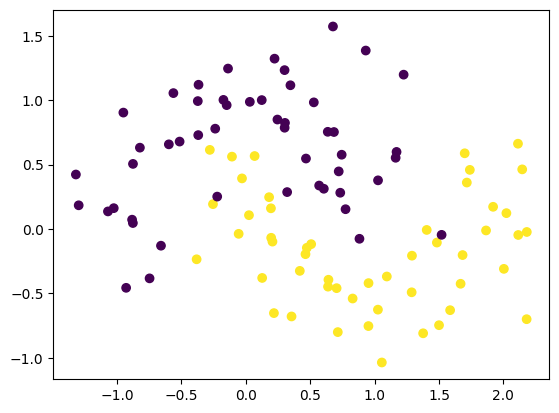

In [28]:
# Create a scatter plot of the data points, colored by their class
plt.scatter(df['X'],df['Y'],c=df['class'])
# Show the plot
plt.show()

In [29]:
# Separate the features (X) and the target variable (y)
# X includes the first two columns ('X' and 'Y')
x = df.iloc[:,0:2].values
# y includes the last column ('class')
y = df.iloc[:, -1].values

In [30]:
# Import TensorFlow and Keras for building the neural network
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [31]:
# Create a Sequential model, which is a linear stack of layers
model = Sequential()

# Add a Dense (fully connected) layer with 10 neurons and 'tanh' activation
# input_dim=2 specifies the input shape (2 features) for the first layer
model.add(Dense(10, activation='tanh', input_dim=2))
# Add another Dense layer with 10 neurons and 'tanh' activation
model.add(Dense(10, activation='tanh'))
# Add another Dense layer with 10 neurons and 'tanh' activation
model.add(Dense(10, activation='tanh'))
# Add another Dense layer with 10 neurons and 'tanh' activation
model.add(Dense(10, activation='tanh'))

# Add the output layer with 1 neuron and 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Display a summary of the model architecture, including the number of parameters
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Get the initial weights of the model's layers
model.get_weights()

[array([[-0.06746495, -0.15671277, -0.09391159,  0.36294383, -0.6107861 ,
         -0.2857403 , -0.48474252,  0.21983713,  0.27486992, -0.3875455 ],
        [ 0.16517264, -0.5495772 ,  0.47074753,  0.5005017 ,  0.6154719 ,
         -0.0774489 ,  0.33448344,  0.3201173 ,  0.06321943,  0.20420992]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.08917373, -0.14701876,  0.16443074,  0.36563748, -0.5395533 ,
          0.01984835,  0.432571  ,  0.10237843, -0.12573084,  0.38253284],
        [-0.2914638 ,  0.5389242 , -0.14848489,  0.41687626, -0.2637003 ,
          0.10136259, -0.43584418, -0.32109863, -0.14835572,  0.2668754 ],
        [-0.2425291 ,  0.44774514, -0.06717473,  0.4392389 , -0.39186043,
         -0.53127694,  0.05195439, -0.19557333,  0.26852512,  0.02659464],
        [-0.240204  ,  0.46380866,  0.45445347,  0.25154877,  0.18649149,
          0.3929153 ,  0.5125359 ,  0.09768999,  0.13924909, -0.36455244],
        [-0.01381

In [33]:
# Store the initial weights in a variable
initial_weights = model.get_weights()

In [34]:
# Manually initialize the weights and biases for each layer
# The weights are initialized using a normal distribution with a scaling factor (He initialization)
# The biases are initialized to zeros
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [35]:
# Set the model's weights to the manually initialized weights
model.set_weights(initial_weights)

In [36]:
# Mount Google Drive to access files stored in Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Get the weights of the model after setting them (to verify the initialization)
model.get_weights()

[array([[ 0.81589174, -0.5286663 , -0.31982   , -0.6359621 ,  0.92054904,
         -0.7266424 , -0.11563774,  0.69253594, -0.92094636, -0.12926286],
        [-1.1551396 , -1.102832  , -0.18036449,  2.19514   , -1.2718959 ,
          1.3267162 , -0.3148051 , -0.07675064, -0.4111377 ,  0.03587632]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.44926158, -0.04623441, -0.09565648, -0.50183773,  0.02218346,
         -0.09663232,  0.1888994 , -0.28251967,  0.09380242, -0.10474498],
        [ 0.43505284,  0.32324114, -0.48141563,  0.5291347 ,  0.28411236,
          0.16282244,  0.03558705,  0.19375938, -0.5124272 , -0.26816693],
        [ 0.41865125, -0.2074033 , -0.03496823,  0.15753753,  0.02726919,
         -0.2787261 ,  0.33613852, -0.0197979 , -0.3349947 ,  0.05156909],
        [-0.17668477, -0.12287713,  0.49118957, -0.76294625,  0.02502498,
         -0.31277677, -0.16274628,  0.30037954, -0.23530726, -0.00640067],
        [ 0.01282

In [38]:
# Compile the model
# Use 'binary_crossentropy' as the loss function for binary classification
# Use 'Adam' as the optimizer
# Track 'accuracy' as a metric
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
# Train the model using the training data (x, y)
# Train for 100 epochs (iterations over the entire dataset)
# Use 20% of the data for validation during training
history = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.2523 - loss: 1.0085 - val_accuracy: 0.1500 - val_loss: 0.9860
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2875 - loss: 0.9421 - val_accuracy: 0.1500 - val_loss: 0.9404
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2656 - loss: 0.9166 - val_accuracy: 0.2000 - val_loss: 0.8970
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2688 - loss: 0.9000 - val_accuracy: 0.2500 - val_loss: 0.8553
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3008 - loss: 0.8609 - val_accuracy: 0.3000 - val_loss: 0.8159
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2930 - loss: 0.8286 - val_accuracy: 0.3500 - val_loss: 0.7793
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3305 - loss: 0.7859 - val_accuracy: 0.4000 - val_loss: 0.7449
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3469 - loss: 0.7592 - val_accuracy: 0.4000 - val_los

In [40]:
# Get the weights of the model after training
model.get_weights()

[array([[ 0.76151377, -0.58291966, -0.3606531 , -0.68491507,  0.8412061 ,
         -0.7010643 , -0.15465102,  0.80024   , -0.99440604, -0.00230754],
        [-1.2377652 , -1.0511975 , -0.16165693,  2.16267   , -1.3876023 ,
          1.2744926 , -0.3158487 ,  0.0043159 , -0.40330142,  0.0303804 ]],
       dtype=float32),
 array([ 0.00434804, -0.00462707, -0.09527285,  0.0573898 , -0.13026923,
         0.05626001, -0.10977995,  0.09963761, -0.23124133, -0.04174134],
       dtype=float32),
 array([[-0.51899123, -0.11474112, -0.18193841, -0.5643209 ,  0.04929714,
         -0.01843106,  0.2742521 , -0.35527223,  0.03217969, -0.20312013],
        [ 0.35064858,  0.2525464 , -0.5403671 ,  0.5695027 ,  0.2008324 ,
          0.18962894,  0.082256  ,  0.11312144, -0.56949717, -0.3431103 ],
        [ 0.43872884, -0.19003238,  0.03175612,  0.237945  , -0.10804172,
         -0.33772355,  0.22517847,  0.01425319, -0.3734054 ,  0.11305267],
        [-0.10841204, -0.05575546,  0.5711731 , -0.7067327 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


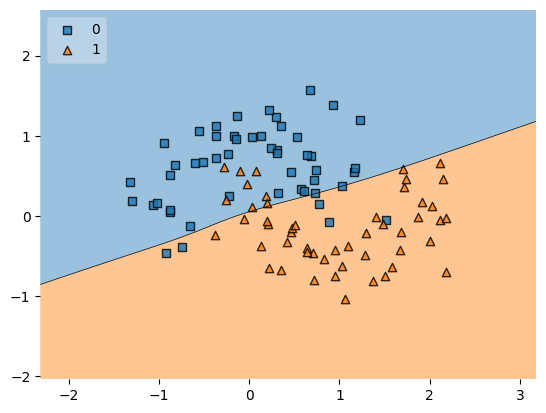

In [41]:
# Import the plot_decision_regions function from mlxtend
from mlxtend.plotting import plot_decision_regions
# Plot the decision boundary of the trained model
# x: features, y: target variable (converted to integer type), clf: the trained model, legend: display the legend
plot_decision_regions(x, y.astype('int') ,clf=model, legend=2)
# Show the plot
plt.show()

In [42]:
# Import necessary libraries for building a new neural network model
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [43]:
# Create a new Sequential model
model = Sequential()

# Add Dense layers with 'relu' activation and 'he_normal' kernel initializer
# 'he_normal' is a good initializer for layers using 'relu' activation
model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer='he_normal')) # 'he_uniform'/'he_normal'
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# Add the output layer with 1 neuron and 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Display a summary of the new model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Get the initial weights of the new model's layers
model.get_weights()

[array([[ 0.3619223 , -1.4583393 ,  0.86811656,  0.17106889, -0.6272249 ,
         -0.92528975, -0.9089004 , -1.1744927 ,  0.31119642, -0.3346246 ],
        [-0.01894847, -0.01098954,  0.58393806, -0.8739393 ,  2.0416484 ,
         -0.64592135, -2.1981244 , -0.95801485, -0.45234635, -0.85958606]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.47068477, -0.03980139,  0.06477121,  0.4718088 ,  0.52931666,
          0.21830083, -0.18904987,  0.70236444,  0.3745935 ,  0.3440217 ],
        [ 0.24578844, -0.46562538,  0.3695121 , -0.25788426, -0.40088773,
          0.43570536,  0.13774373, -0.21307248,  0.20897955,  0.1077375 ],
        [ 0.8206099 ,  0.17941129, -0.6436906 , -0.0042659 ,  0.15746541,
          0.06994416, -0.00634162,  0.4358757 ,  0.07422632, -0.33509365],
        [ 0.62092775, -0.21569373, -0.34669068,  0.3130298 , -0.02494654,
         -1.0142905 ,  0.16746604, -0.38264713, -0.6625224 ,  0.5372772 ],
        [ 0.75344

In [45]:
# Compile the new model
# Use 'binary_crossentropy' as the loss function
# Use 'Adam' as the optimizer
# Track 'accuracy' as a metric
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [46]:
# Train the new model using the training data (x, y)
# Train for 100 epochs
# Use 20% of the data for validation
history = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.5000 - loss: 1.1004 - val_accuracy: 0.5000 - val_loss: 1.3167
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4805 - loss: 1.0565 - val_accuracy: 0.5000 - val_loss: 1.2431
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 1.0004 - val_accuracy: 0.5000 - val_loss: 1.1734
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4961 - loss: 0.9304 - val_accuracy: 0.5000 - val_loss: 1.1072
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.9186 - val_accuracy: 0.4500 - val_loss: 1.0443
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.5430 - loss: 0.8660 - val_accuracy: 0.4000 - val_loss: 0.9872
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4500 - loss: 0.8759 - val_accuracy: 0.3500 - val_loss: 0.9325
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4141 - loss: 0.8420 - val_accuracy: 0.3500 - val_los

In [47]:
# Get the weights of the new model after training
model.get_weights()

[array([[ 0.375649  , -1.4287022 ,  0.7993689 ,  0.36599812, -0.5188886 ,
         -0.9824202 , -0.8192813 , -1.2689661 ,  0.4402534 , -0.477655  ],
        [-0.03668225, -0.06425271,  0.56279117, -1.0525223 ,  2.0716484 ,
         -0.6763486 , -2.1469667 , -0.894118  , -0.70806205, -0.6930477 ]],
       dtype=float32),
 array([ 0.05225569, -0.07209731, -0.09564346,  0.1466444 , -0.00091374,
         0.00727796, -0.04448812, -0.04171486,  0.13154495, -0.11917461],
       dtype=float32),
 array([[ 0.5464484 ,  0.11758596,  0.28141555,  0.56636024,  0.3340182 ,
          0.25466692, -0.2371834 ,  0.60884494,  0.4934762 ,  0.48109418],
        [ 0.16644484, -0.582014  ,  0.28991535, -0.36892515, -0.28371212,
          0.41425323,  0.2239236 , -0.1048535 ,  0.33536574,  0.07701338],
        [ 0.7068664 ,  0.3383895 , -0.62396646,  0.05944156, -0.02856441,
          0.06846877, -0.07269116,  0.38461155,  0.22999676, -0.3322952 ],
        [ 0.8275145 , -0.08874752, -0.13111569,  0.455406  , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


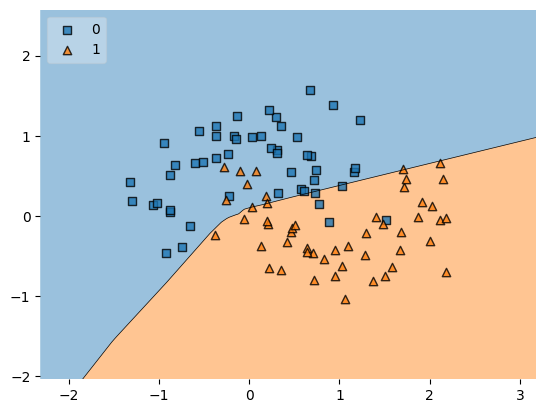

In [48]:
# Import the plot_decision_regions function from mlxtend
from mlxtend.plotting import plot_decision_regions
# Plot the decision boundary of the new trained model
# x: features, y: target variable (converted to integer type), clf: the trained model, legend: display the legend
plot_decision_regions(x, y.astype('int') ,clf=model, legend=2)
# Show the plot
plt.show()